In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10/alexnet/log/gui'
path_4b = os.path.join(log_dir, '06')
path_5b = os.path.join(log_dir, '08')
path_6b = os.path.join(log_dir, '07')
path_8b = os.path.join(log_dir, '03')
path_16b = os.path.join(log_dir, '04')
path_32b = os.path.join(log_dir, '05')

In [9]:
exp_4b = ExpResults(path_4b, '4 bit', '+', 'brown')
exp_5b = ExpResults(path_5b, '5 bit', '<', 'orange')
exp_6b = ExpResults(path_6b, '6 bit', 's', 'red')
exp_8b = ExpResults(path_8b, '8 bit', '^', 'm')
exp_16b = ExpResults(path_16b, '16 bit', 'o', 'green')
exp_32b = ExpResults(path_32b, '32 bit', '*')
experiments = [exp_4b, exp_5b, exp_6b, exp_8b, exp_16b, exp_32b]

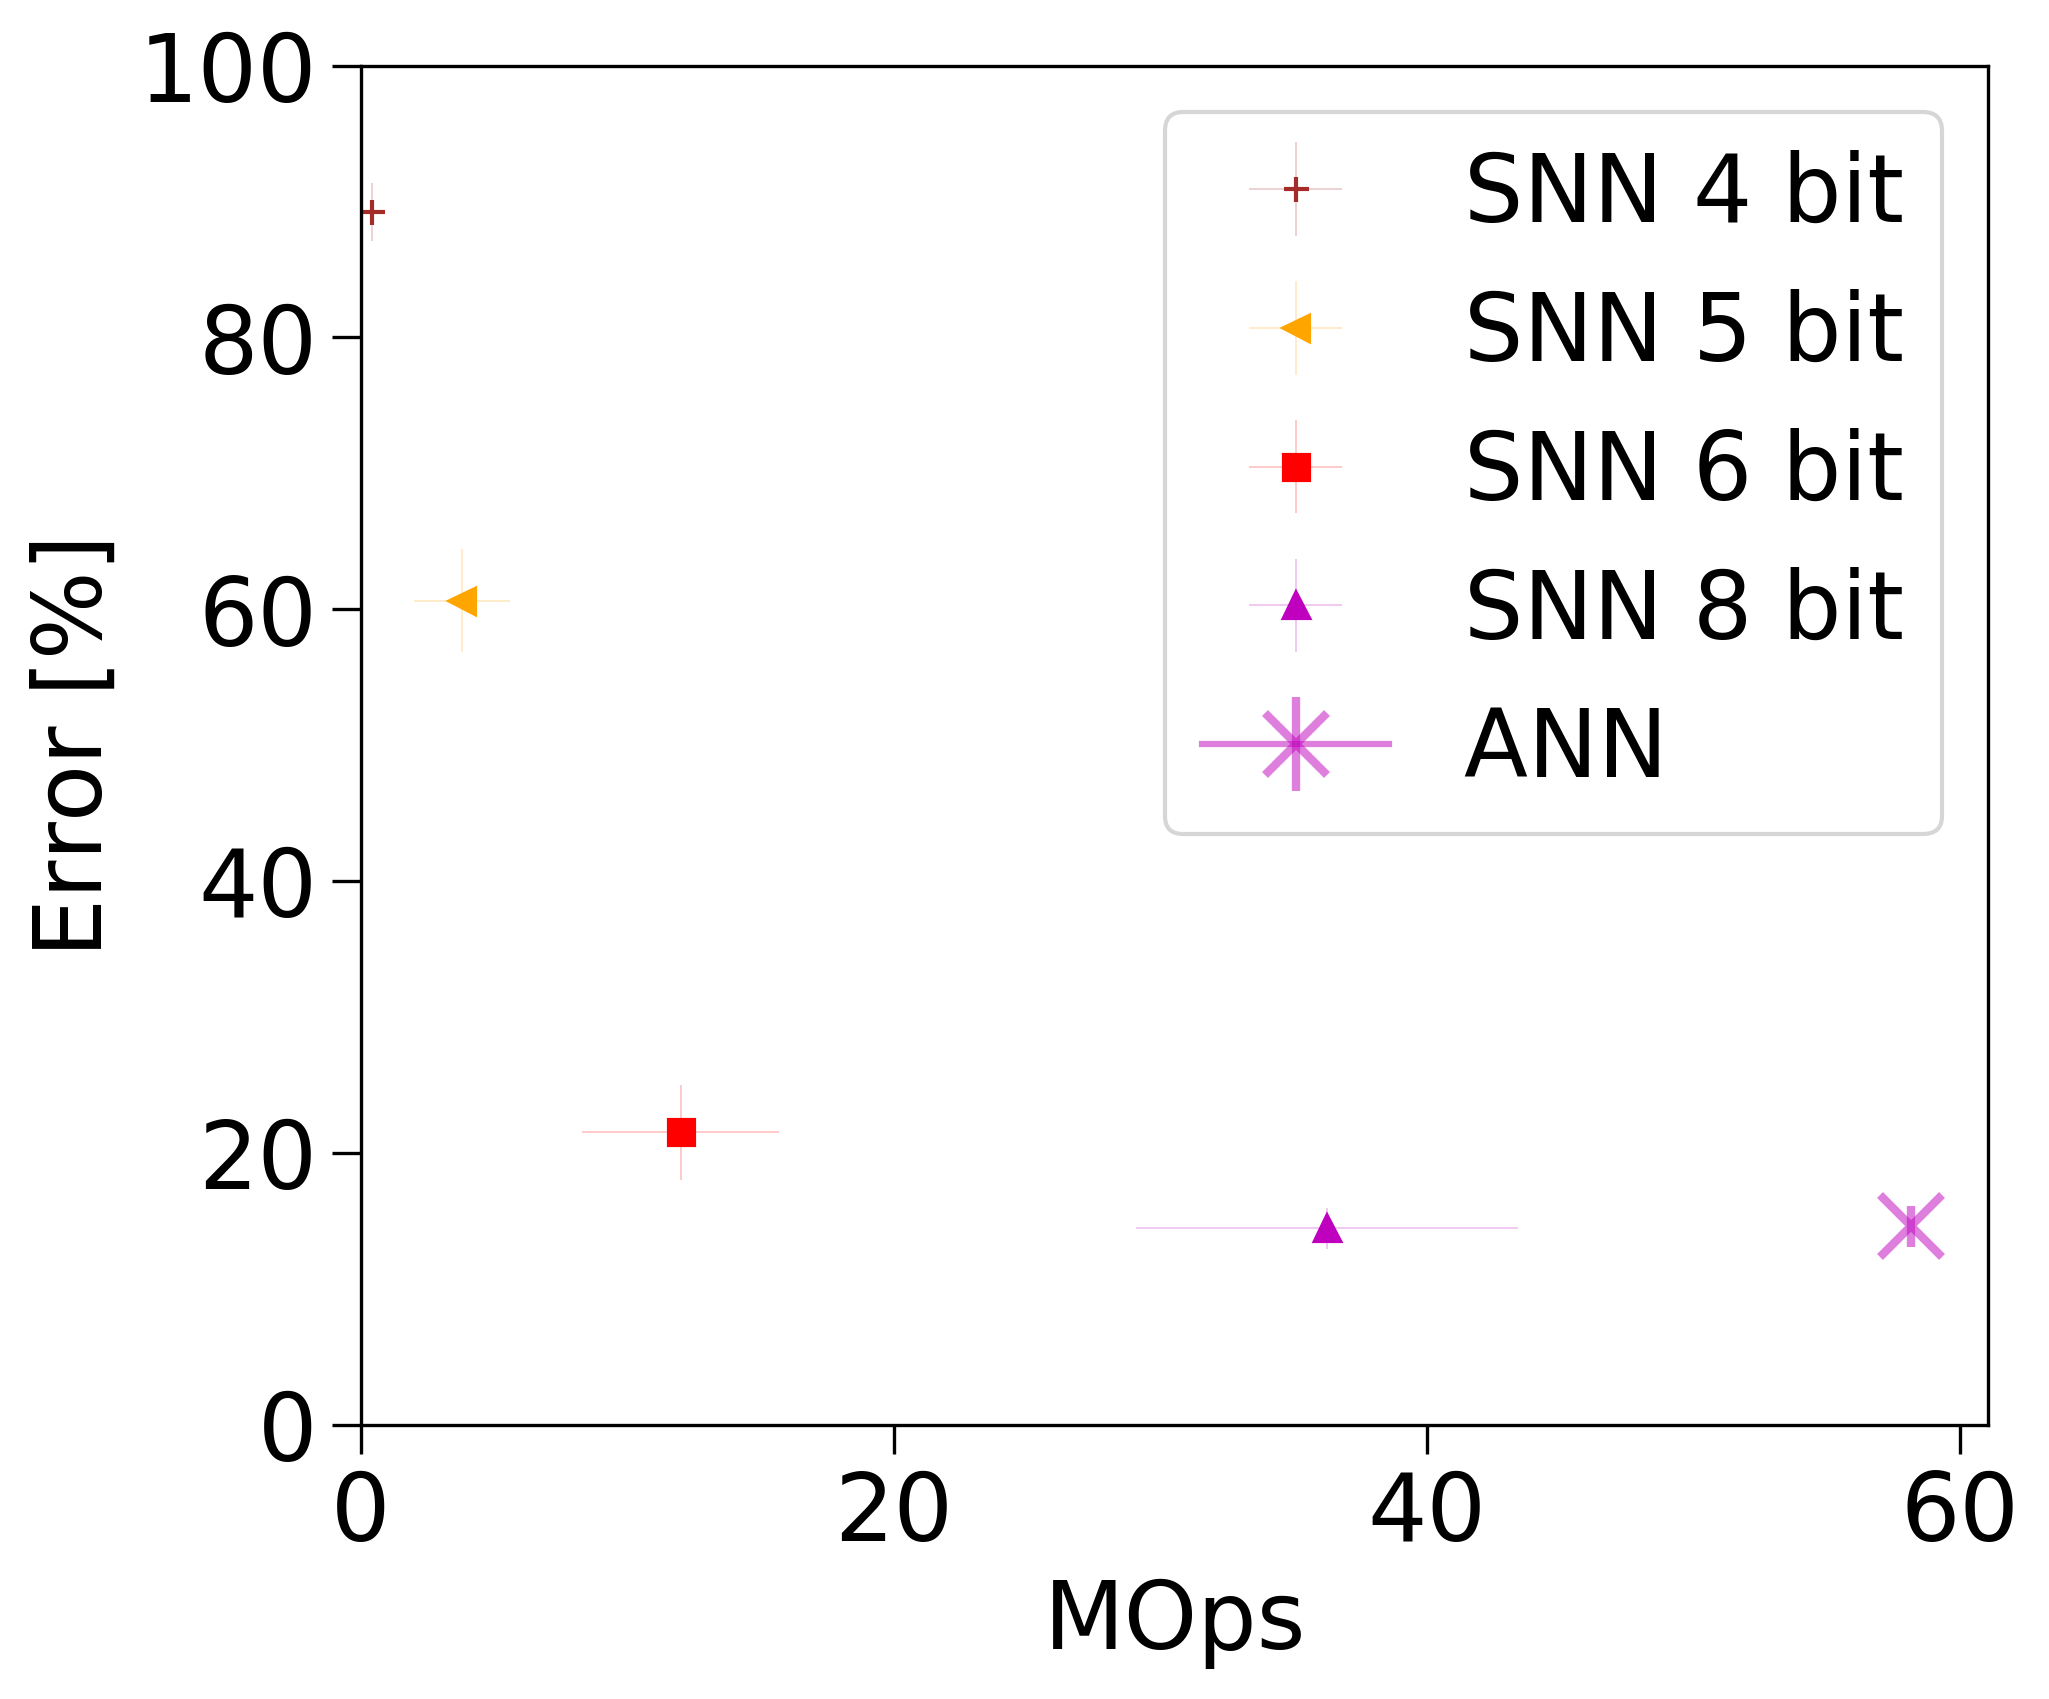

In [10]:
for exp in experiments[:-2]:

    plt.errorbar(exp.mean_computations_t[-1], exp.e1_mean[-1], xerr=exp.std_computations_t[-1],
                 yerr=exp.e1_confidence95[-1], fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    
exp = exp_8b
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN ', color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
    
plt.ylim(0, 100)
plt.xlim(0, None)
plt.ylabel('Error [%]')
plt.xlabel('MOps')
plt.legend(loc='upper right')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [8]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:   ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1:   ({:.5f} MOps/frame, {:.2f} %)'.format(exp.mean_computations_t[-1], exp.e1_mean[-1]))
    print('')

4 bit
ANN top-1:   (58.17297 MOps/frame, 14.34 %)
SNN top-1:   (0.42290 MOps/frame, 89.25 %)

5 bit
ANN top-1:   (58.17297 MOps/frame, 13.70 %)
SNN top-1:   (3.80415 MOps/frame, 60.63 %)

6 bit
ANN top-1:   (58.17297 MOps/frame, 13.46 %)
SNN top-1:   (12.00412 MOps/frame, 21.50 %)

8 bit
ANN top-1:   (58.17297 MOps/frame, 14.58 %)
SNN top-1:   (36.25917 MOps/frame, 14.43 %)

16 bit
ANN top-1:   (58.17297 MOps/frame, 14.65 %)
SNN top-1:   (154.07238 MOps/frame, 14.65 %)

32 bit
ANN top-1:   (58.17297 MOps/frame, 0.00 %)
SNN top-1:   (403.19890 MOps/frame, 0.00 %)

